Importing the necessary Python libraries

# Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import VotingClassifier

In [104]:
from xgboost import XGBClassifier
from vecstack import stacking
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import brier_score_loss
import h2o
from h2o.automl import H2OAutoML

# Data Loading

In [5]:
train = pd.read_csv("cs-training.csv", index_col = 0)
test = pd.read_csv("cs-test.csv", index_col = 0)

In [6]:
print(train.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   

In [7]:
print(test.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1               NaN                              0.885519   43   
2               NaN                              0.463295   57   
3               NaN                              0.043275   59   
4               NaN                              0.280308   38   
5               NaN                              1.000000   27   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     0   0.177513         5700.0   
2                                     0   0.527237         9141.0   
3                                     0   0.687648         5083.0   
4                                     1   0.925961         3200.0   
5                                     0   0.019917         3865.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                                4                        0   
2                               15                        0   

In [8]:
summary_df = train.describe()
print(summary_df)

       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  150000.000000   
mean           0.066840                              6.048438      52.295207   
std            0.249746                            249.755371      14.771866   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.202690e+05   
mean                               0.421033     353.005076   6.670221e+03   
std                                4.192781    2

In [9]:
#print structure of data
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB
None


In [10]:
print(train.dtypes)

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


# Data Description

# Data Understanding

# Plan of Attack

# Data Cleansing

### Remove Whitespace

In [11]:
#strip whitespace from entire data frame
train = train.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [12]:
print(train.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   

### NA Values

Replace with central tendency metric

In [13]:
#are the any NA values?
train.isnull().values.any()

True

In [14]:
#which columns have missing values
train.isnull().sum()[train.isnull().sum()>0]

MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64

As you can see, there are missing values in only two features: MonthlyIncomeand NumberOfDependents

In [15]:
#what percentage of records are missing
train.isnull().sum()[train.isnull().sum()>0]/len(train)

MonthlyIncome         0.198207
NumberOfDependents    0.026160
dtype: float64

MonthlyIncome has nearly 20% of it's data as missing. This is quote high and brings us to a decision point. We can drop this column entirely, drop the rows containing missing values, or impute the missing values. SimpleImputation may be subject to error since it would be applying a central tendency value to all 29731 of these rows; however, imputation is important since Machine Learning algorithms don't like missing values. We can also impute using a sophisticated, predictive method. 

From subject matter context, we know that monthly income is a feature important in our dataset and will elect to keep it. Therefore, we will be doing imputation for these missing values. 

In [16]:
train_full = train.copy()

In [17]:
income_median = train_full['MonthlyIncome'].median()

#REMEMBER TO TRY ITERATIVE IMPUTER

#### DO WE NEED TO TAKE MEDIAN FROM NON NA ROWS ONLY?

In [18]:
income_median

5400.0

In [19]:
train_full['MonthlyIncome'].fillna(income_median, inplace=True)

In [20]:
train_full['MonthlyIncome'].isnull().sum()

0

No more missing values in Monthly Income! Now NumberOfDependents

In [21]:
dependents_median = train_full['NumberOfDependents'].median()

In [22]:
train_full['NumberOfDependents'].fillna(dependents_median, inplace = True)

In [23]:
train_full['NumberOfDependents'].isnull().sum()

0

No more missing values in NumberOfDependents! Now onto Outliers.

### Outlier Values

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


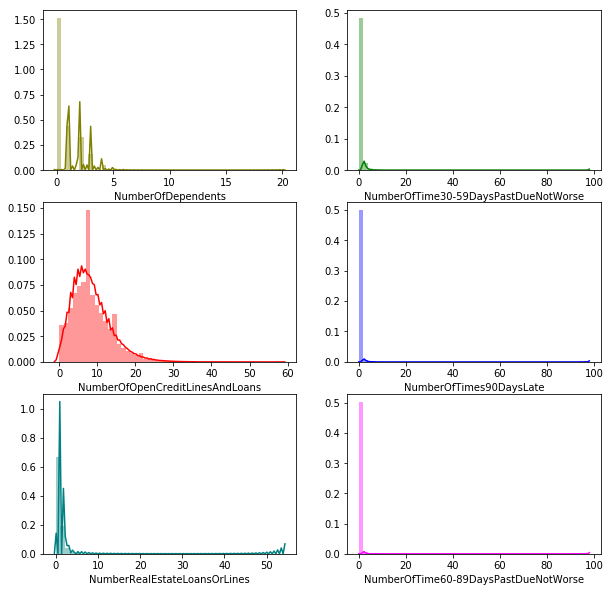

In [24]:
#check outliers
df = train_full
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
sns.distplot( df["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( df["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( df["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( df["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( df["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( df["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])

As we can see by a subset of 6 variables, they are almost all largely skewed to the right, meaning that there are many outliers present in the data. We will now remove rows containing an outlier in any of the variables. 

In [25]:
#before: summarize the number of rows and columns in the dataset
print(df.shape)

(150000, 11)


In [26]:
zscore = np.abs(stats.zscore(df.iloc[:,1:11]))
print(zscore)
threshold = 3

[[0.02115001 0.49385982 0.37659296 ... 4.40954554 0.05785249 1.14052977]
 [0.02038516 0.83234222 0.10041896 ... 0.90128301 0.05785249 0.23720186]
 [0.02158222 0.96773518 0.138087   ... 0.90128301 0.05785249 0.66612604]
 ...
 [0.02323239 0.38619443 0.10041896 ... 0.01614492 0.05785249 0.66612604]
 [0.02421753 1.50930703 0.10041896 ... 0.90128301 0.05785249 0.66612604]
 [0.02081306 0.79237332 0.10041896 ... 0.86899317 0.05785249 0.66612604]]


In [27]:
#show indexes of outliers
print(np.where(zscore >3))

(array([     0,      4,     44, ..., 149899, 149916, 149968], dtype=int64), array([7, 4, 5, ..., 9, 5, 9], dtype=int64))


In [28]:
print(zscore[0][7])

4.409545538528969


Let's rcount outliers as anythign greater than 2.5 zscores from the mean, as this is a common rule of thumb.

In [29]:
df_full = df
df_full = df_full[(zscore < 2.5).all(axis=1)]
print(df_full.shape)

(137774, 11)


In [30]:
print(df_full['SeriousDlqin2yrs'].describe())

count    137774.000000
mean          0.064076
std           0.244889
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SeriousDlqin2yrs, dtype: float64


It looks like 12,226‬‬ outlier rows were removed. Let's see if this improves our histograms a bit.

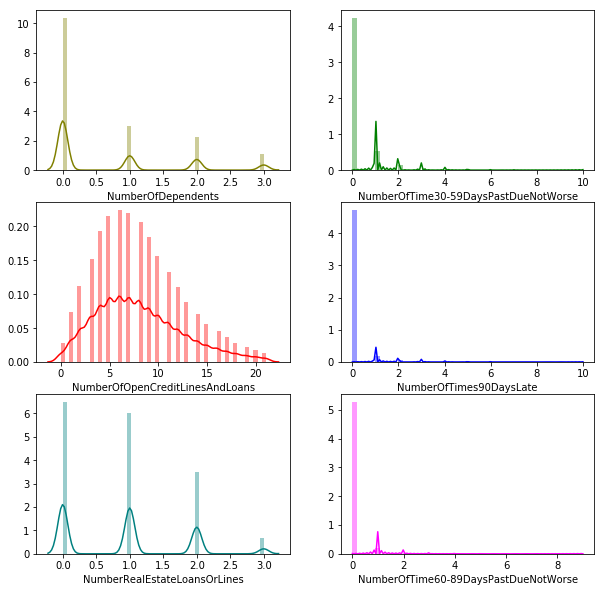

In [31]:
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
sns.distplot( df_full["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( df_full["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( df_full["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( df_full["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( df_full["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( df_full["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])

There is certainly improvement! We will need to apply transforms to ensure normal distributions for regression. It is perfectly okay that the distributions are still skewed, now the outlier values have just been removed.

Now we have a dataset void of outliers and missing values - let's move onto visualizations and more preprocessing. 

# Exploratory Data Visualizations

# Data Standardization/Normalization

Some algorithms, such as Neural Networks, require data to be consolidated into a standard range, such as 0-1. I will create a standard range dataset using min/max normalization.

In [32]:
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(df_full)
scaled_df = pd.DataFrame(scaled_df, columns=['SeriousDlqin2yrs','RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [33]:
scaled_df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.001554,0.279412,0.0,2.237903e-05,0.067387,0.190476,0.0,0.000000,0.000000,0.333333
1,0.0,0.001068,0.250000,0.1,1.562860e-05,0.078843,0.095238,0.1,0.000000,0.000000,0.000000
2,0.0,0.000380,0.132353,0.0,6.619479e-06,0.085530,0.238095,0.0,0.000000,0.000000,0.000000
3,0.0,0.000346,0.779412,0.0,6.896933e-05,0.090714,0.142857,0.0,0.333333,0.000000,0.333333
4,0.0,0.001225,0.264706,0.0,3.854940e-05,0.090714,0.380952,0.0,0.000000,0.000000,0.000000
5,0.0,0.000190,0.088235,0.0,8.446566e-03,0.139958,0.095238,0.0,0.000000,0.000000,0.000000
6,0.0,0.001046,0.132353,0.0,5.682633e-05,0.064795,0.238095,0.0,0.000000,0.000000,0.000000
7,0.0,0.000031,0.441176,0.0,9.759985e-05,0.168494,0.333333,0.0,0.666667,0.000000,0.666667
8,0.0,0.000017,0.367647,0.0,5.478408e-05,0.322785,0.619048,0.0,0.666667,0.000000,0.666667
9,1.0,0.001566,0.279412,0.3,7.032037e-05,0.355079,0.428571,0.3,0.333333,0.111111,0.666667


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


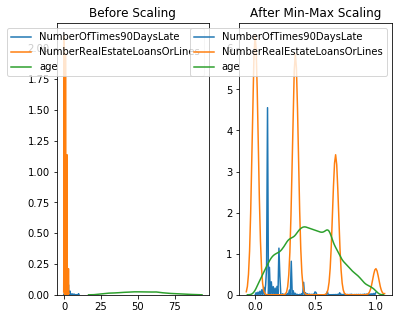

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df_full['NumberOfTimes90DaysLate'], ax=ax1)
sns.kdeplot(df_full['NumberRealEstateLoansOrLines'], ax=ax1)
sns.kdeplot(df_full['age'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['NumberOfTimes90DaysLate'], ax=ax2)
sns.kdeplot(scaled_df['NumberRealEstateLoansOrLines'], ax=ax2)
sns.kdeplot(scaled_df['age'], ax=ax2)
plt.show()

Now all data points are scaled to the 0-1 range!

Some algorithms, such as Regression, require data to be normally distributed. I will create this by applying various transforms to the features such as log, square root, or cube root.

In [35]:
df_full2 = df_full[['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']]
bc = PowerTransformer(method='box-cox', standardize=False)
yj = PowerTransformer(method='yeo-johnson', standardize=False)

In [36]:
norm_df = yj.fit_transform(df_full2)
norm_df = pd.DataFrame(norm_df, columns=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])

In [37]:
norm_df = pd.merge(df_full[['SeriousDlqin2yrs']], norm_df, left_index=True, right_index= True)

In [38]:
norm_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000,126554.000000
mean,0.063672,0.149191,20.878914,0.021390,0.480863,131.322010,3.772855,0.002720,0.521446,0.001924,0.171368
std,0.244169,0.126052,4.359937,0.049982,0.508651,40.933351,1.493157,0.011299,0.450670,0.008488,0.221967
min,0.000000,-0.000000,10.792723,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
25%,0.000000,0.027714,17.682764,-0.000000,0.148763,110.449542,2.884606,-0.000000,-0.000000,-0.000000,-0.000000
50%,0.000000,0.118520,21.016471,-0.000000,0.276712,131.362228,3.635404,-0.000000,0.679993,-0.000000,-0.000000
75%,0.000000,0.275014,24.141101,-0.000000,0.504286,149.861315,4.892751,-0.000000,0.679993,-0.000000,0.402234
max,1.000000,0.425704,30.933683,0.138831,1.492729,344.361404,7.312339,0.049660,1.334339,0.039379,0.522334


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


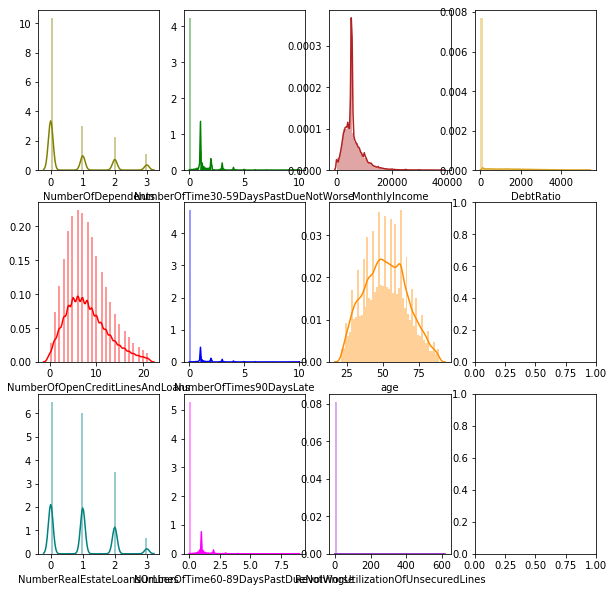

In [39]:
f, axes = plt.subplots(3, 4, figsize=(10, 10), sharex=False)
sns.distplot( df_full2["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( df_full2["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( df_full2["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( df_full2["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( df_full2["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( df_full2["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])
sns.distplot( df_full2["MonthlyIncome"] , color="firebrick", ax=axes[0, 2])
sns.distplot( df_full2["age"] , color="darkorange", ax=axes[1, 2])
sns.distplot( df_full2["RevolvingUtilizationOfUnsecuredLines"] , color="darkorchid", ax=axes[2, 2])
sns.distplot( df_full2["DebtRatio"] , color="goldenrod", ax=axes[0, 3])

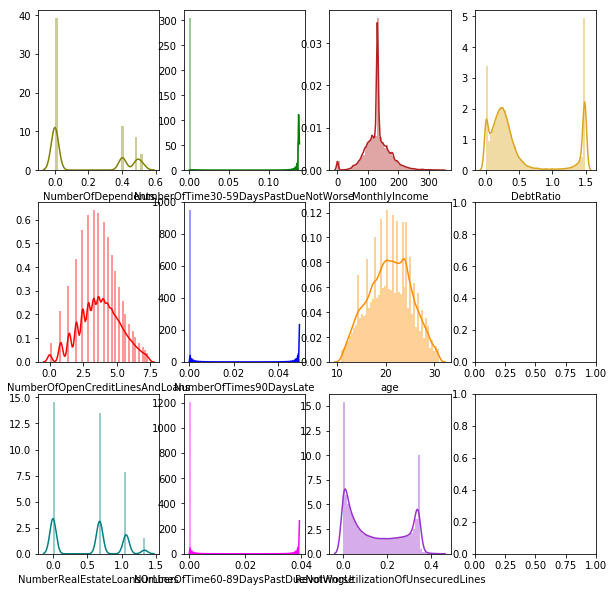

In [40]:
f, axes = plt.subplots(3, 4, figsize=(10, 10), sharex=False)
sns.distplot( norm_df["NumberOfDependents"] , color="olive", ax=axes[0, 0])
sns.distplot( norm_df["NumberOfTime30-59DaysPastDueNotWorse"] , color="green", ax=axes[0, 1])
sns.distplot( norm_df["NumberOfOpenCreditLinesAndLoans"] , color="red", ax=axes[1, 0])
sns.distplot( norm_df["NumberOfTimes90DaysLate"] , color="blue", ax=axes[1, 1])
sns.distplot( norm_df["NumberRealEstateLoansOrLines"] , color="teal", ax=axes[2, 0])
sns.distplot( norm_df["NumberOfTime60-89DaysPastDueNotWorse"] , color="magenta", ax=axes[2, 1])
sns.distplot( norm_df["MonthlyIncome"] , color="firebrick", ax=axes[0, 2])
sns.distplot( norm_df["age"] , color="darkorange", ax=axes[1, 2])
sns.distplot( norm_df["RevolvingUtilizationOfUnsecuredLines"] , color="darkorchid", ax=axes[2, 2])
sns.distplot( norm_df["DebtRatio"] , color="goldenrod", ax=axes[0, 3])

As you can see, the yeo-johnson transform did imporve the data's normal distribution.

# Train/Validate Split

In [41]:
columns=(['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents'])
full_train_cols = pd.DataFrame(df_full, columns = columns)
full_train_target = pd.DataFrame(df_full['SeriousDlqin2yrs'])
#full, unscaled dataset split
fullxTrain, fullxTest, fullyTrain, fullyTest = train_test_split(full_train_cols, full_train_target, test_size = 0.2)

In [42]:
scaled_train_cols = pd.DataFrame(scaled_df, columns = columns)
scaled_train_target = pd.DataFrame(scaled_df['SeriousDlqin2yrs'])
#scaled dataset split
scaledxTrain, scaledxTest, scaledyTrain, scaledyTest = train_test_split(scaled_train_cols, scaled_train_target, test_size = 0.2)

In [43]:
norm_train_cols = pd.DataFrame(norm_df, columns = columns)
norm_train_target = pd.DataFrame(norm_df['SeriousDlqin2yrs'])
#normal distributed dataset split
normxTrain, normxTest, normyTrain, normyTest = train_test_split(norm_train_cols, norm_train_target, test_size = 0.2)

In [44]:
print(fullxTrain.shape, fullyTrain.shape)
print(fullxTest.shape, fullyTest.shape)

(110219, 10) (110219, 1)
(27555, 10) (27555, 1)


In [45]:
print(scaledxTrain.shape, scaledyTrain.shape)
print(scaledxTest.shape, scaledyTest.shape)

(110219, 10) (110219, 1)
(27555, 10) (27555, 1)


In [46]:
print(normxTrain.shape, normyTrain.shape)
print(normxTest.shape, normyTest.shape)

(101243, 10) (101243, 1)
(25311, 10) (25311, 1)


In [47]:
print(fullxTrain.describe(), fullyTrain.describe())

       RevolvingUtilizationOfUnsecuredLines            age  \
count                         110219.000000  110219.000000   
mean                               0.378338      52.153513   
std                                4.754256      14.804843   
min                                0.000000      21.000000   
25%                                0.029252      41.000000   
50%                                0.149599      52.000000   
75%                                0.558681      63.000000   
max                              616.000000      89.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         110219.000000  110219.000000  110219.000000   
mean                               0.237654     286.768547    5938.939375   
std                                0.679707     813.538738    3714.750892   
min                                0.000000       0.000000       0.000000   
25%                                0.000000       0.1698

In [48]:
#print results
print(fullxTest.describe(), fullyTest.describe())

       RevolvingUtilizationOfUnsecuredLines           age  \
count                          27555.000000  27555.000000   
mean                               0.422225     52.297877   
std                                6.150144     14.714119   
min                                0.000000     21.000000   
25%                                0.028416     41.000000   
50%                                0.148605     52.000000   
75%                                0.551790     63.000000   
max                              470.000000     89.000000   

       NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  MonthlyIncome  \
count                          27555.000000  27555.000000   27555.000000   
mean                               0.237126    283.621587    5994.835493   
std                                0.677531    813.376526    3776.882034   
min                                0.000000      0.000000       0.000000   
25%                                0.000000      0.168083    3806.5000

In [49]:
print(scaledxTrain.describe(), scaledyTrain.describe())
#print results
print(scaledxTest.describe(), scaledyTest.describe())

       RevolvingUtilizationOfUnsecuredLines            age  \
count                         110219.000000  110219.000000   
mean                               0.000636       0.458359   
std                                0.008591       0.217307   
min                                0.000000       0.000000   
25%                                0.000048       0.294118   
50%                                0.000244       0.455882   
75%                                0.000910       0.617647   
max                                1.000000       1.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         110219.000000  110219.000000  110219.000000   
mean                               0.023936       0.052447       0.154258   
std                                0.068483       0.149282       0.096626   
min                                0.000000       0.000000       0.000000   
25%                                0.000000       0.0000

In [50]:
print(normxTrain.describe(), normyTrain.describe())
#print results
print(normxTest.describe(), normyTest.describe())

       RevolvingUtilizationOfUnsecuredLines            age  \
count                         101243.000000  101243.000000   
mean                               0.148844      20.875912   
std                                0.125982       4.366490   
min                               -0.000000      10.792723   
25%                                0.027542      17.682764   
50%                                0.117987      21.016471   
75%                                0.274332      24.141101   
max                                0.425704      30.933683   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         101243.000000  101243.000000  101243.000000   
mean                               0.021326       0.481076     131.367240   
std                                0.049921       0.509012      40.929000   
min                               -0.000000      -0.000000       0.000000   
25%                               -0.000000       0.1486

# Logistic Regression

### Multi-collinearity analysis

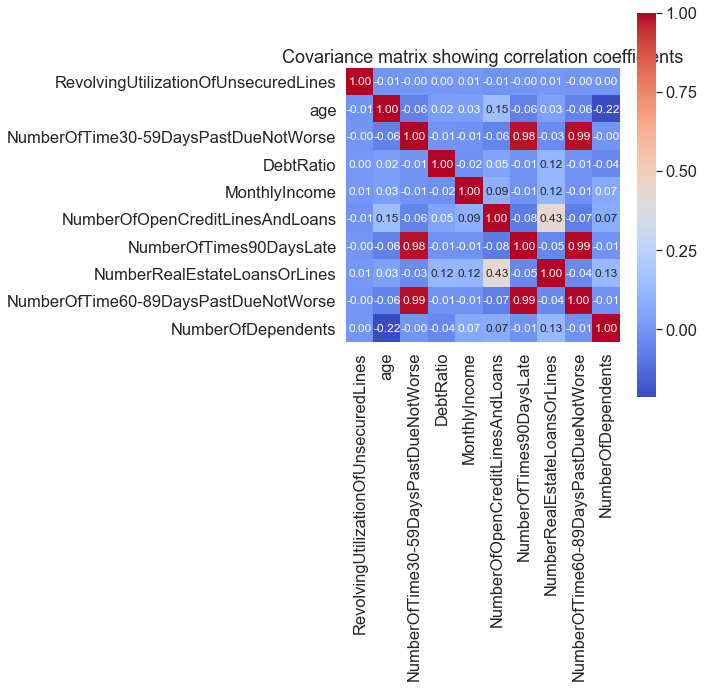

In [51]:
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(df[columns].iloc[:,range(0,10)].values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=columns,
                 xticklabels=columns)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in r

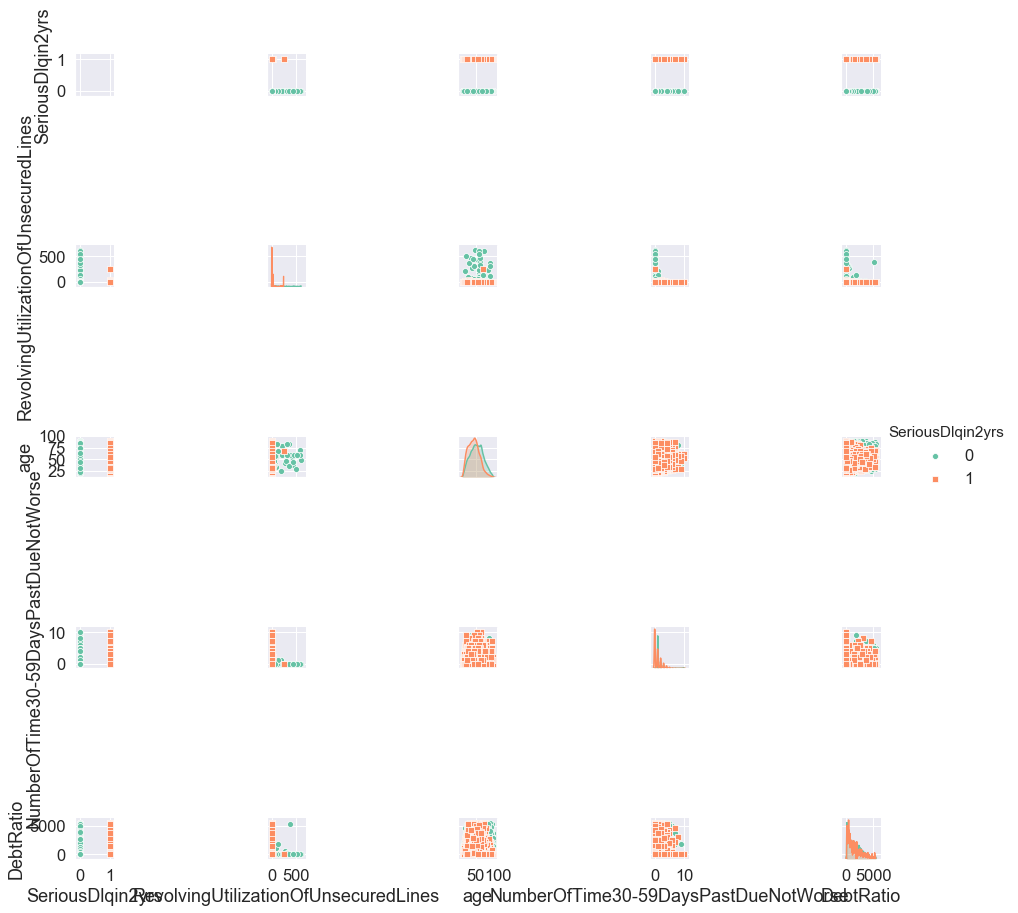

In [52]:
sns.pairplot(df_full.iloc[:,0:5], kind="scatter", hue="SeriousDlqin2yrs", markers=["o", "s"], palette="Set2")

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


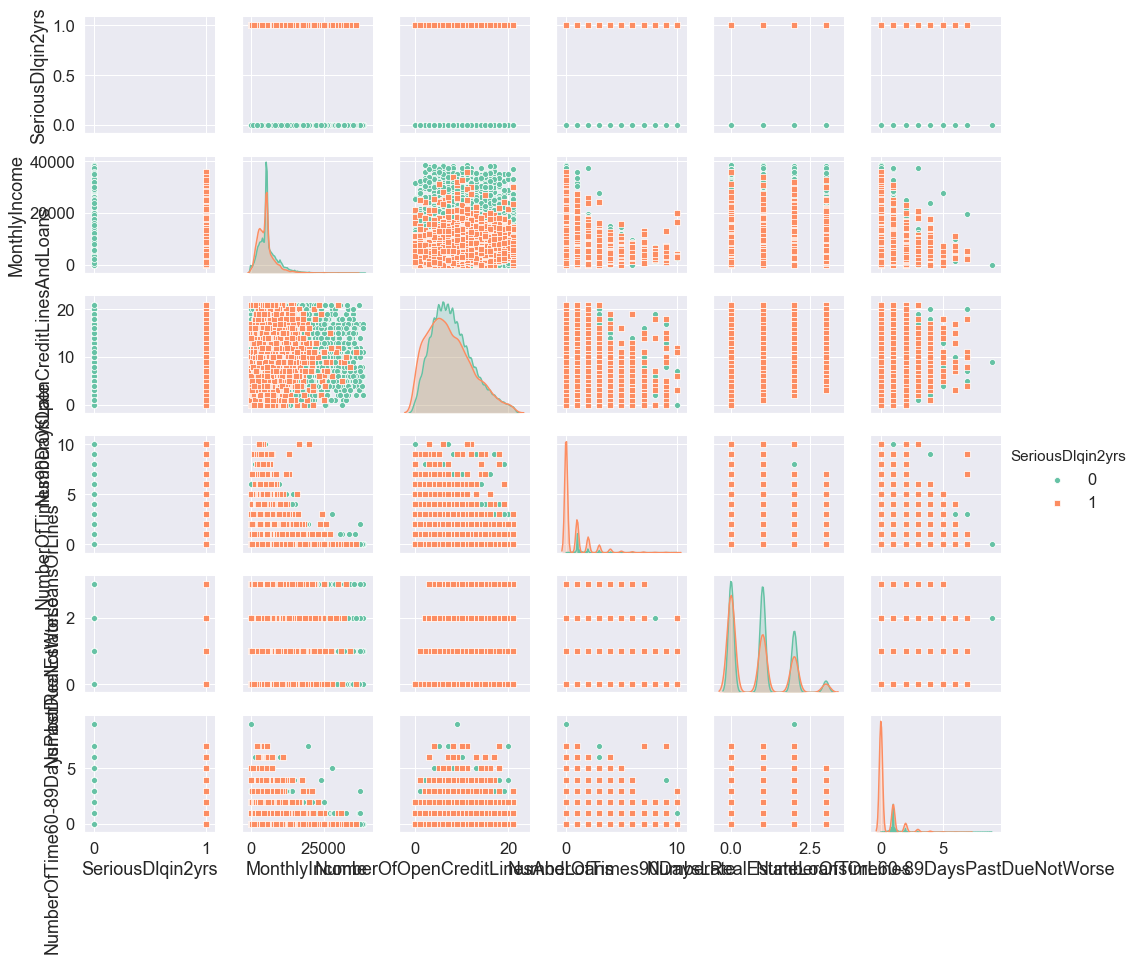

In [53]:
r = np.r_[0, 5:10]
sns.pairplot(df_full.iloc[:,r], kind="scatter", hue="SeriousDlqin2yrs", markers=["o", "s"], palette="Set2")

In [54]:
normyTrain['SeriousDlqin2yrs'].value_counts()

0    94843
1     6400
Name: SeriousDlqin2yrs, dtype: int64

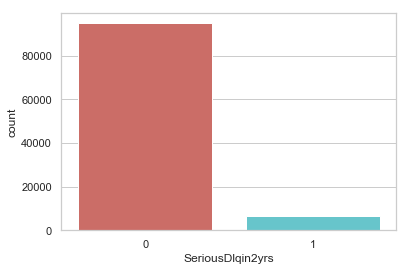

In [55]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='SeriousDlqin2yrs', data=normyTrain, palette ='hls')
plt.show()

Dataset is largely non-defaulted loans, but hopefully we can draw some strong conclusions/patterns from the 6457 defaulted loans ("1").

In [56]:
count_default = len(normyTrain[normyTrain['SeriousDlqin2yrs']==1])
count_no_default = len(normyTrain[normyTrain['SeriousDlqin2yrs']==0])
pct_of_default = count_default/(count_default+count_no_default)
print("percentage of default", pct_of_default*100)
pct_of_no_default = count_no_default/(count_default+count_no_default)
print("percentage of no default", pct_of_no_default*100)

percentage of default 6.321424691089754
percentage of no default 93.67857530891025


In [57]:
norm_df.groupby('SeriousDlqin2yrs').mean()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,,,,,,,,,,
0,0.149296,20.878136,0.021434,0.481345,131.319332,3.772140,0.002724,0.521312,0.001931,0.171347
1,0.147644,20.890359,0.020734,0.473772,131.361394,3.783361,0.002656,0.523415,0.001808,0.171686


In [58]:
logreg = LogisticRegression()

In [59]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(normxTrain, normyTrain.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


Looks like every variable is considered a strong predictor, according to Recursive Feature Elimination (RFE).

In [60]:
cols2 = ['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
X = normxTrain[cols2]
y = normyTrain['SeriousDlqin2yrs']

In [61]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.241309
         Iterations 7
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       -0.024    
Dependent Variable:         SeriousDlqin2yrs       AIC:                    48877.7540
Date:                       2019-12-11 15:28       BIC:                    48953.9563
No. Observations:           101243                 Log-Likelihood:         -24431.   
Df Model:                   7                      LL-Null:                -23865.   
Df Residuals:               101235                 LLR p-value:            1.0000    
Converged:                  1.0000                 Scale:                  1.0000    
No. Iterations:             7.0000                                                   
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    z     P>|z|   [0.

In [62]:
logreg.fit(normxTrain,normyTrain.values.ravel())

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
y_pred_lr = logreg.predict(normxTest)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(normxTest, normyTest)))

Accuracy of logistic regression classifier on test set: 0.93


In [64]:
confusion_matrix_lr = confusion_matrix(normyTest, y_pred_lr)
print(confusion_matrix_lr)

[[23653     0]
 [ 1658     0]]


# Decision Tree

In [65]:
dt_model = tree.DecisionTreeClassifier()
dt_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [66]:
dt = dt_model.fit(fullxTrain,fullyTrain)
dt2 = dt_model2.fit(fullxTrain,fullyTrain)

Try to visualize decision tree

In [67]:
y_pred2 = dt_model2.predict(fullxTest)

In [68]:
print('Accuracy:',dt_model2.score(fullxTest,fullyTest))

Accuracy: 0.9396479767737252


In [69]:
pd.DataFrame(
    confusion_matrix(fullyTest, y_pred2),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25725,121
True Default,1542,167


We had more false negatives than false positives, which is not ideal.

# Random Forest

In [70]:
rf = RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

In [71]:
rf_model = rf.fit(fullxTrain, fullyTrain)

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k

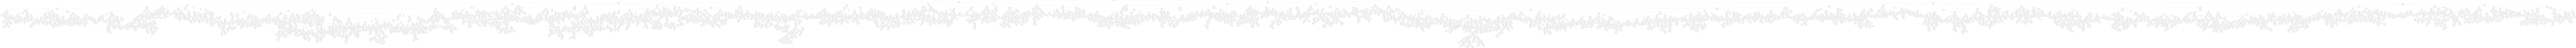

In [72]:
dtree = rf.estimators_[0]
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [73]:
rf.oob_score_

0.9285604115442891

In [74]:
print('Accuracy:',rf_model.score(fullxTest,fullyTest))

Accuracy: 0.9379060061694793


In [75]:
y_pred3 = rf.predict(fullxTest)

pd.DataFrame(
    confusion_matrix(fullyTest, y_pred3),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25576,270
True Default,1441,268


# Support Vector Machines (SVM)

# Artificial Neural Networks (ANN)

In [76]:
ann = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
ann.fit(scaledxTrain, scaledyTrain.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [77]:
predictions2 = ann.predict(scaledxTest)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(scaledyTest,predictions2))
print(classification_report(scaledyTest,predictions2))

[[25602   219]
 [ 1444   290]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     25821
         1.0       0.57      0.17      0.26      1734

   micro avg       0.94      0.94      0.94     27555
   macro avg       0.76      0.58      0.61     27555
weighted avg       0.92      0.94      0.92     27555



In [79]:
print('Accuracy:',ann.score(scaledxTest,scaledyTest))

Accuracy: 0.9396479767737252


In [80]:
y_pred4 = ann.predict(scaledxTest)

pd.DataFrame(
    confusion_matrix(scaledyTest, y_pred4),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,25602,219
True Default,1444,290


# k-Nearest Neighbors (k-NN)

# Stacked Ensemble Model

In [81]:
models = [logreg, dt_model2, rf, ann]

In [82]:
S_train, S_test = stacking(models,                   
                           fullxTrain, fullyTrain, fullxTest,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [LogisticRegression]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  0:  [0.93748866]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  1:  [0.93844130]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  2:  [0.93844130]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  3:  [0.93943930]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  4:  [0.93821168]
    ----
    MEAN:     [0.93840445] + [0.00062442]
    FULL:     [0.93840445]

model  1:     [DecisionTreeClassifier]
    fold  0:  [0.93753402]
    fold  1:  [0.93739793]
    fold  2:  [0.93708038]
    fold  3:  [0.93943930]
    fold  4:  [0.93666924]
    ----
    MEAN:     [0.93762418] + [0.00095516]
    FULL:     [0.93762418]

model  2:     [RandomForestClassifier]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


    fold  0:  [0.93458537]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


    fold  1:  [0.93662675]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


    fold  2:  [0.93413174]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


    fold  3:  [0.93658138]


C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


    fold  4:  [0.93621558]
    ----
    MEAN:     [0.93562816] + [0.00105618]
    FULL:     [0.93562816]

model  3:     [MLPClassifier]
    fold  0:  [0.93667211]
    fold  1:  [0.93540192]
    fold  2:  [0.93127382]
    fold  3:  [0.93989294]
    fold  4:  [0.93766729]
    ----
    MEAN:     [0.93618162] + [0.00286063]
    FULL:     [0.93618160]



In [83]:
ensemble_model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
ensemble_model = ensemble_model.fit(S_train, fullyTrain)
y_pred_ensemble = ensemble_model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(fullyTest, y_pred_ensemble))

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Final prediction score: [0.94033751]


In [84]:
model_ens = VotingClassifier(estimators=[('lr', logreg), ('dt', dt_model2), ('rf', rf), ('ann', ann) ], voting='soft')
model_ens.fit(fullxTrain,fullyTrain)
model_ens.score(fullxTest,fullyTest)

C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alexb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were

0.940736708401379

Can we ensemble on the same dataset? Or does it have to be scaled??????

In [118]:
h2o_xtrain = h2o.H2OFrame(scaledxTrain)
h2o_ytrain = h2o.H2OFrame(scaledyTrain)
h2o_xtest = h2o.H2OFrame(scaledxTest)
h2o_ytest = h2o.H2OFrame(scaledyTest)
h2o_scaled_full = h2o.H2OFrame(scaled_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [142]:
h2o_ytrain = h2o_ytrain.asfactor()
h2o_ytest = h2o_ytest.asfactor()

In [133]:
x = scaled_train_cols.columns.tolist()

In [146]:
h2o_scaled_train = h2o_ytrain.cbind(h2o_xtrain)
h2o_scaled_test = h2o_ytest.cbind(h2o_xtest)
h2o_scaled_train['SeriousDlqin2yrs'] = h2o_scaled_train['SeriousDlqin2yrs'].asfactor()
h2o_scaled_test['SeriousDlqin2yrs'] = h2o_scaled_test['SeriousDlqin2yrs'].asfactor()

In [147]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=1, seed=1)
aml.train(x=x, y="SeriousDlqin2yrs", training_frame=h2o_scaled_train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,mean_per_class_error,rmse,mse
GLM_grid_1_AutoML_20191211_182138_model_1,0.816686,0.192694,0.302492,0.225442,0.0508239


In [155]:
# The leader model is stored here
aml.leader

# If you need to generate predictions on a test set, you can make
# predictions directly on the `"H2OAutoML"` object, or on the leader
# model object directly

h2o_predictions = aml.predict(h2o_scaled_test)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
# If you need to generate predictions on a test set, you can make
# predictions directly on the `"H2OAutoML"` object, or on the leader
# model object directly

h2o_predictions = aml.predict(h2o_scaled_test)

In [171]:
h2o_predictions

predict,p0,p1
0,0.979337,0.0206627
0,0.939696,0.0603043
0,0.97874,0.0212595
0,0.894504,0.105496
0,0.928002,0.0719977
0,0.880867,0.119133
0,0.969991,0.0300085
0,0.981955,0.0180448
0,0.94874,0.0512602
0,0.956995,0.0430047


In [173]:
# H2O accuracy
h2o_predictions_df = h2o_predictions.as_data_frame()
print("H2O: " + str(accuracy_score(scaledyTest, h2o_predictions_df.predict)))

H2O: 0.9201959716929777


In [180]:
pd.DataFrame(
    confusion_matrix(scaledyTest, h2o_predictions_df.predict),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

,Predicted Not Default,Predicted Default
True Not Default,24566,1255
True Default,944,790


# Comparison of All Models

### Percentage of Correct Classification

###### Logistic Regression

In [ ]:
print('Accuracy:',accuracy_score(normyTest, y_pred_lr))

In [ ]:
pd.DataFrame(
    confusion_matrix(normyTest, y_pred_lr),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

###### Decision Tree

In [ ]:
print('Accuracy:',accuracy_score(fullyTest, y_pred2))

In [ ]:
pd.DataFrame(
    confusion_matrix(fullyTest, y_pred2),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

###### Random Forest

In [ ]:
print('Accuracy:',accuracy_score(fullyTest, y_pred3))

In [ ]:
pd.DataFrame(
    confusion_matrix(fullyTest, y_pred3),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

###### Support Vector Machines

###### Artificial Neural Networks

In [ ]:
print('Accuracy:',accuracy_score(scaledyTest, y_pred4))

In [ ]:
pd.DataFrame(
    confusion_matrix(scaledyTest, y_pred4),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

###### k-Nearest Neighbors

###### Ensemble Model

In [ ]:
print('Accuracy:',accuracy_score(fullyTest, y_pred_ensemble))

In [ ]:
pd.DataFrame(
    confusion_matrix(fullyTest, y_pred_ensemble),
    columns=['Predicted Not Default', 'Predicted Default'],
    index=['True Not Default', 'True Default']
)

### Area Under ROC Curve

###### Logistic Regression

In [ ]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(normyTest, y_pred_lr)

In [ ]:
thresholds_lr

In [ ]:
fpr_lr

In [ ]:
tpr_lr

In [ ]:
auc_lr = roc_auc_score(normyTest, y_pred_lr)
print('AUC lr:%.3f'% auc_lr)

In [ ]:
plt.plot(fpr_lr,tpr_lr,'b-', label= 'LR AUC: %.3f'%auc_lr)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### Decision Tree

In [ ]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(fullyTest, y_pred2)

In [ ]:
thresholds_dt

In [ ]:
fpr_dt

In [ ]:
tpr_dt

In [ ]:
auc_dt = roc_auc_score(fullyTest, y_pred2)
print('AUC dt:%.3f'% auc_dt)

In [ ]:
plt.plot(fpr_dt,tpr_dt,'b-', label= 'DT AUC: %.3f'%auc_dt)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### Random Forest

In [ ]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(fullyTest, y_pred3)

In [ ]:
thresholds_rf

In [ ]:
fpr_rf

In [ ]:
tpr_rf

In [ ]:
auc_rf = roc_auc_score(fullyTest, y_pred3)
print('AUC rf:%.3f'% auc_rf)

In [ ]:
plt.plot(fpr_rf,tpr_rf,'b-', label= 'RF AUC: %.3f'%auc_rf)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### Support Vector Machines

###### Artificial Neural Networks

In [ ]:
fpr_ann, tpr_ann, thresholds_ann = roc_curve(scaledyTest, y_pred4)

In [ ]:
thresholds_ann

In [ ]:
fpr_ann

In [ ]:
tpr_ann

In [ ]:
auc_ann = roc_auc_score(scaledyTest, y_pred4)
print('AUC ann:%.3f'% auc_ann)

In [ ]:
plt.plot(fpr_ann,tpr_ann,'b-', label= 'ANN AUC: %.3f'%auc_ann)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

###### k-Nearest Neighbors

##### Ensemble Model

In [ ]:
fpr_ens, tpr_ens, thresholds_ens = roc_curve(fullyTest, y_pred_ensemble)

In [ ]:
thresholds_ens

In [ ]:
fpr_ens

In [ ]:
tpr_ens

In [ ]:
auc_ens = roc_auc_score(fullyTest, y_pred_ensemble)
print('AUC ens:%.3f'% auc_ens)

In [ ]:
plt.plot(fpr_ens,tpr_ens,'b-', label= 'ANN ENS: %.3f'%auc_ens)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
plt.plot(fpr_lr,tpr_lr,'b-', label= 'LR AUC: %.3f'%auc_lr)
plt.plot(fpr_dt,tpr_dt,'r-', label= 'DT AUC: %.3f'%auc_dt)
plt.plot(fpr_rf,tpr_rf,'y-', label= 'RF AUC: %.3f'%auc_rf)
plt.plot(fpr_ann,tpr_ann,'m-', label= 'ANN AUC: %.3f'%auc_ann)
plt.plot(fpr_ens,tpr_ens,'c-', label= 'ANN ENS: %.3f'%auc_ens)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Brier's Score

###### Logistic Regression

In [ ]:
# predict probabilities
probs = logreg.predict_proba(normxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(normyTest, probs)
print(loss)

###### Decision Tree

In [ ]:
# predict probabilities
probs = dt_model2.predict_proba(fullxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(fullyTest, probs)
print(loss)

###### Random Forest

In [ ]:
# predict probabilities
probs = rf.predict_proba(fullxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(fullyTest, probs)
print(loss)

###### Support Vector Machines

###### Artificial Neural Networks

In [ ]:
# predict probabilities
probs = ann.predict_proba(fullxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(scaledyTest, probs)
print(loss)

###### k-Nearest Neighbors

##### Ensemble Model

In [ ]:
# predict probabilities
probs = model_ens.predict_proba(fullxTest)
# keep the predictions for class 1 only
probs = probs[:, 1]
# calculate bier score
loss = brier_score_loss(fullyTest, probs)
print(loss)

### Precision

###### Logistic Regression

In [ ]:
precision_score(normyTest, y_pred_lr)

###### Decision Tree

In [ ]:
precision_score(fullyTest, y_pred2)

###### Random Forest

In [ ]:
precision_score(fullyTest, y_pred3)

###### Support Vector Machines

###### Artificial Neural Networks

In [ ]:
precision_score(scaledyTest, y_pred4)

###### k-Nearest Neighbors

##### Ensemble Model

In [ ]:
precision_score(fullyTest, y_pred_ensemble)

### Recall

###### Logistic Regression

In [ ]:
recall_score(normyTest, y_pred_lr)

###### Decision Tree

In [ ]:
recall_score(fullyTest, y_pred2)

###### Random Forest

In [ ]:
recall_score(fullyTest, y_pred3)

###### Support Vector Machines

###### Artificial Neural Networks

In [ ]:
recall_score(scaledyTest, y_pred4)

###### k-Nearest Neighbors

##### Ensemble Model

In [ ]:
recall_score(fullyTest, y_pred_ensemble)

### F1 Score

###### Logistic Regression

In [ ]:
f1_score(normyTest, y_pred_lr)

###### Decision Tree

In [ ]:
f1_score(fullyTest, y_pred2)

###### Random Forest

In [ ]:
f1_score(fullyTest, y_pred3)

###### Support Vector Machines

###### Artificial Neural Networks

In [ ]:
f1_score(scaledyTest, y_pred4)

###### k-Nearest Neighbors

##### Ensemble Model

In [ ]:
f1_score(fullyTest, y_pred_ensemble)

# References

https://machinelearningmastery.com/how-to-score-probability-predictions-in-python/b

https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e

https://medium.com/datadriveninvestor/accuracy-trap-pay-attention-to-recall-precision-f-score-auc-d02f28d3299c

https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019

https://medium.com/towards-artificial-intelligence/feature-selection-and-dimensionality-reduction-using-covariance-matrix-plot-b4c7498abd07

https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93

https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

https://www.kaggle.com/rtatman/practical-model-evaluation-day-2?utm_medium=email&utm_source=intercom&utm_campaign=automl-event

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#automl-output